In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os

In [2]:
np.random.seed(5)

In [3]:
data_path = os.path.join("..", "data", "pima-indians-diabetes.csv")
data = np.loadtxt(data_path, delimiter=",")

In [4]:
x_train = data[:700, 0:8]
y_train = data[:700, 8]

x_test = data[700:, 0:8]
y_test = data[700:, 8]

In [5]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
opt = optimizers.Adam(learning_rate=0.01)

In [7]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=64)

Epoch 1/1000
11/11 [==============================] - 1s 5ms/step - loss: 2.1765 - accuracy: 0.5043
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 1.1557 - accuracy: 0.5643
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 1.0753 - accuracy: 0.5543
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.8126 - accuracy: 0.6543
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.7227 - accuracy: 0.6471
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6692 - accuracy: 0.6686
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6786
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6072 - accuracy: 0.6943
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.7171 - accuracy: 0.6571
Epoch 10/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.6700

In [9]:
accuracy = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1] * 100))

3/3 [==============================] - 0s 20ms/step - loss: 0.7868 - accuracy: 0.8382
accuracy: 83.82%


In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

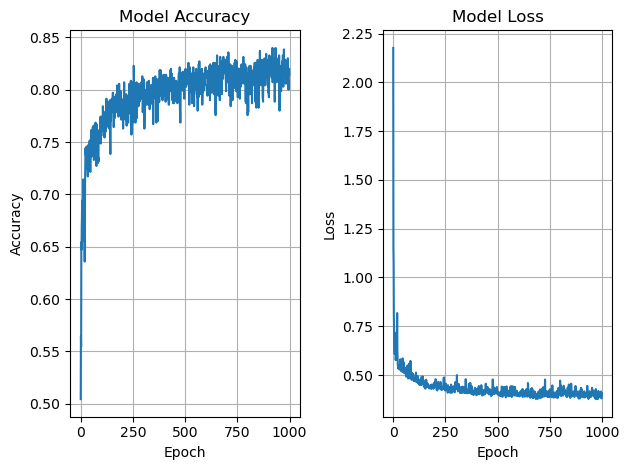

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()